# Training our CNN model

In [75]:
import numpy as np
import tensorflow as tf
from PIL import Image
import random
import matplotlib.pyplot as plt
from IPython import display

In [76]:
import os
import numpy as np

# Define the directory containing .npy files
directory_e = 'train/E'
directory_s = 'train/S'
directory_sb = 'train/SB'

# Get a list of all .npy files in the directory
files_e = [f for f in os.listdir(directory_e) if f.endswith('.jpg')]
files_s = [f for f in os.listdir(directory_s) if f.endswith('.jpg')]
files_sb = [f for f in os.listdir(directory_sb) if f.endswith('.jpg')]

data_e = []
data_s = []
data_sb = []

for file in files_e:
    file_path = os.path.join(directory_e, file)
    image = Image.open(file_path)
    image = image.resize((28,28))
    data_e.append(image)
for file in files_s:
    file_path = os.path.join(directory_s, file)
    image = Image.open(file_path)
    image = image.resize((28,28))
    data_s.append(image)
for file in files_sb:
    file_path = os.path.join(directory_sb, file)
    image = Image.open(file_path)
    image = image.resize((28,28))
    data_sb.append(image)





In [77]:
data_e = np.array(data_e)
data_s = np.array(data_s)
data_sb = np.array(data_sb)
for e in range(len(data_e)):
    data_e[e] = np.array(data_e[e])
    # print(e.shape)
for s in range(len(data_s)):
    data_s[s] = np.array(data_s[s])
for sb in range(len(data_sb)):
    data_sb[sb] = np.array(data_sb[sb])



C:\Users\surya\AppData\Local\Temp\ipykernel_18708\3318312754.py:1: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  data_e = np.array(data_e)
C:\Users\surya\AppData\Local\Temp\ipykernel_18708\3318312754.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data_e = np.array(data_e)
C:\Users\surya\AppData\Local\Temp\ipykernel_18708\3318312754.py:2: FutureWarning: The input 

In [78]:
data_e[0].shape

(28, 28, 3)

In [79]:
def rgb_to_grayscale(image_array):
    """
    Convert an RGB image to grayscale using the luminosity method.
    The weights are based on the human perception of colors.
    """
    r, g, b = image_array[:,:,0], image_array[:,:,1], image_array[:,:,2]
    grayscale_image = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return grayscale_image


for e in range(len(data_e)):
    data_e[e] = rgb_to_grayscale(data_e[e])
    # print(e.shape)
for s in range(len(data_s)):
    data_s[s] = rgb_to_grayscale(data_s[s])
for sb in range(len(data_sb)):
    data_sb[sb] = rgb_to_grayscale(data_sb[sb])
 

In [80]:
data_e[0].shape

(28, 28)

In [81]:
# for e in range(len(data_e)):
#     # print(data_e[e].shape)
#     data_e[e] = data_e[e].reshape(256,256)
# for s in range(len(data_s)):
#     data_s[s] = data_s[s].reshape(256,256)
# for sb in range(len(data_sb)):
#     data_sb[sb] = data_sb[sb].reshape(256,256)

In [82]:
for e in range(len(data_e)):
    data_e[e] = data_e[e].flatten()
    # print(e.shape)
for s in range(len(data_s)):
    data_s[s] = data_s[s].flatten()
for sb in range(len(data_sb)):
    data_sb[sb] = data_sb[sb].flatten()

In [83]:
data_e.shape

(900,)

In [84]:
data = np.concatenate((list(data_e),list(data_s),list(data_sb)),axis=0)


In [85]:
data.shape

(2203, 784)

In [86]:
e = 0
s=1
sb=2

label=[]
for i in range(data.shape[0]):
    if i < 900:
        label.append(e)
    elif i >=900 and i < 1800:
        label.append(s)
    else:
        label.append(sb)




In [90]:
# label = np.expand_dims(np.array(label),axis=1)
# label.shape

In [91]:
data = np.concatenate((list(data), label),axis=1)
data.shape

(2203, 785)

In [92]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import keras_tuner
import tensorflow_probability as tfp
from tensorflow_probability import distributions as tfd
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,Input,Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras import layers
from keras import regularizers



In [267]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
# scaler_x = StandardScaler()
# scaler_y = StandardScaler()

# data_arr = np.array(df_merged_new)
# data_arr = np.array(data_new)
np.random.shuffle(data)
X = data[:,0:-1]
y = data[:,-1]

# max(X[:,2])
y

array([0., 0., 0., ..., 1., 1., 2.])

In [268]:
np.min(y)

0.0

In [269]:
X[0]

array([  3.7716,   3.7716,   6.0595,   6.0595,   4.7715,   8.0809,
         8.0701,   8.0593,   7.0702,   5.092 ,   5.793 ,   6.3476,
         7.3475,   8.4722,   5.2445,   7.2443,   7.7712,   3.8856,
         8.0593,   8.5862,   7.651 ,   8.8358,   5.2984,   8.711 ,
        10.8248,   7.6572,   8.0593,   7.1734,   8.7711,   6.7713,
         5.4725,   5.7606,   7.4615,   8.3582,   9.4182,   7.9946,
         7.0594,   7.0702,   6.4832,   6.4832,   8.0593,   9.3473,
        11.1299,   7.2443,   9.771 ,   8.7711,   9.0592,   8.5862,
        10.2378,   8.3197,   7.5648,   7.9669,   8.2981,  10.5259,
         9.0592,  11.173 ,   9.2441,   9.2441,   5.7714,   4.7715,
        10.5321,  37.9593,  28.3732,   9.2333,   8.4722,  10.0483,
         8.1733,   7.3691,   7.0702,  11.0698,  11.0698,   8.0701,
         6.7713,  11.7708,  11.7708,  10.472 ,   7.4723,   8.1949,
         8.7819,   9.771 ,  12.1128,  10.6399,   9.771 ,   7.7712,
         5.2337,   6.2336,   3.4727,   6.6573,  16.7981,  58.7

In [270]:
# for x in range(len(X)):
#     X[x] = (X[x]-127.5)/127.5

X = X/255


In [271]:
X.max()

0.9714733333333333

In [272]:
# X.max(axis=1)
# X

In [273]:
X.shape

(2203, 784)

In [274]:
# y = tf.keras.utils.to_categorical(y, num_classes=3)
# y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

In [277]:
cnn = models.Sequential([
    layers.InputLayer(shape=(28,28,1)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D(pool_size=(2,2),strides=1),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPool2D(pool_size=(2,2),strides=1),
    layers.Flatten(),
    layers.Dense(50,activation='relu'),
    layers.Dense(3,activation='softmax'),
    # layers.Dense(1,activation='sigmoid')
])

In [278]:
cnn.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 23, 23, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 22, 22, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 15488)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 50)             │       774,450 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 3)              │           153 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 793,707 (3.03 MB)

 Trainable params: 793,707 (3.03 MB)

 Non-trainable params: 0 (0.00 B)

In [280]:
cnn.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [281]:
X = X.reshape(-1,28,28)
X = np.expand_dims(X,axis=3)

In [282]:
X.shape

(2203, 28, 28, 1)

In [283]:
# X = X.reshape(-1,28,28,1)

0.0


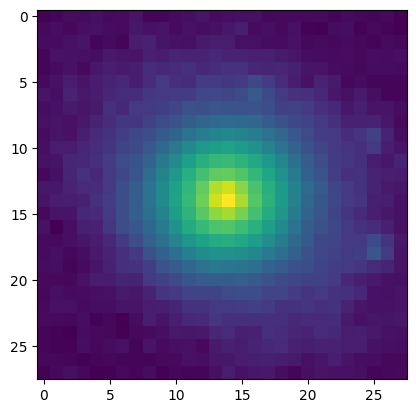

In [284]:
plt.imshow(X[4,:,:])
print(y[4])

In [285]:
y[356]

2.0

In [286]:
X[900]

array([[[0.04616   ],
        [0.01915882],
        [0.00739529],
        [0.03439647],
        [0.01984157],
        [0.02376275],
        [0.05513216],
        [0.02768392],
        [0.00920784],
        [0.0394051 ],
        [0.04332627],
        [0.01587804],
        [0.02372039],
        [0.02372039],
        [0.01361843],
        [0.01321373],
        [0.01506863],
        [0.01547333],
        [0.04914471],
        [0.0479302 ],
        [0.01979922],
        [0.02141843],
        [0.00505098],
        [0.00784235],
        [0.03113373],
        [0.04848   ],
        [0.02405882],
        [0.0316898 ]],

       [[0.03831765],
        [0.01871176],
        [0.02538196],
        [0.03714549],
        [0.00969725],
        [0.02768392],
        [0.04336863],
        [0.01592039],
        [0.01587804],
        [0.02097137],
        [0.01749725],
        [0.00920784],
        [0.03156275],
        [0.05116863],
        [0.02376275],
        [0.02497725],
        [0.02913412],
        

In [287]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=100)
history = cnn.fit(X,y,batch_size=30,epochs=300,validation_split=0.1,shuffle=True,callbacks=[es])


Epoch 1/300
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.4023 - loss: 1.0490 - val_accuracy: 0.6018 - val_loss: 1.0036
Epoch 2/300
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5386 - loss: 1.0099 - val_accuracy: 0.5656 - val_loss: 0.9513
Epoch 3/300
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5460 - loss: 0.9745 - val_accuracy: 0.6199 - val_loss: 0.9418
Epoch 4/300
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5692 - loss: 0.9407 - val_accuracy: 0.6561 - val_loss: 0.8980
Epoch 5/300
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5836 - loss: 0.9255 - val_accuracy: 0.5023 - val_loss: 0.9371
Epoch 6/300
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6063 - loss: 0.9061 - val_accuracy: 0.6787 - val_loss: 0.8588
Epoch 7/300
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6021 - loss: 0.8899 - val_accuracy: 0.6606 - val_loss: 0.8513
Epoch 8/300
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5700 - loss: 0.9198 - val_accuracy: 0.

In [288]:
first_layer_weights = cnn.layers[0].get_weights()

# first_layer_weights is a list where the first element is the weights and the second is the biases
weights, biases = first_layer_weights
biases[:5]

array([0.01670336, 0.01062497, 0.01490494, 0.01078865, 0.02830837],
      dtype=float32)

# Generating synthetic galaxy images using GANs on which we will perform classification 

In [307]:
import os
import numpy as np


# Define the directory containing .npy files
directory_e = 'train/E'
directory_s = 'train/S'
directory_sb = 'train/SB'

# Get a list of all .npy files in the directory
files_e = [f for f in os.listdir(directory_e) if f.endswith('.jpg')]
files_s = [f for f in os.listdir(directory_s) if f.endswith('.jpg')]
files_sb = [f for f in os.listdir(directory_sb) if f.endswith('.jpg')]

data_e_gan = []
data_s_gan = []
data_sb_gan = []

for file in files_e:
    file_path = os.path.join(directory_e, file)
    image = Image.open(file_path)
    image = image.resize((28,28))
    data_e_gan.append(image)
for file in files_s:
    file_path = os.path.join(directory_s, file)
    image = Image.open(file_path)
    image = image.resize((28,28))
    data_s_gan.append(image)
for file in files_sb:
    file_path = os.path.join(directory_sb, file)
    image = Image.open(file_path)
    image = image.resize((28,28))
    data_sb_gan.append(image)





In [308]:
data_e_gan = np.array(data_e_gan)
data_s_gan = np.array(data_s_gan)
data_sb_gan = np.array(data_sb_gan)
for e in range(len(data_e_gan)):
    data_e_gan[e] = np.array(data_e_gan[e])
    # print(e.shape)
for s in range(len(data_s_gan)):
    data_s_gan[s] = np.array(data_s_gan[s])
for sb in range(len(data_sb_gan)):
    data_sb_gan[sb] = np.array(data_sb_gan[sb])



C:\Users\surya\AppData\Local\Temp\ipykernel_18708\3194570370.py:1: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  data_e_gan = np.array(data_e_gan)
C:\Users\surya\AppData\Local\Temp\ipykernel_18708\3194570370.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data_e_gan = np.array(data_e_gan)
C:\Users\surya\AppData\Local\Temp\ipykernel_18708\3194570370.py:2: FutureWar

In [309]:
def rgb_to_grayscale(image_array):
    """
    Convert an RGB image to grayscale using the luminosity method.
    The weights are based on the human perception of colors.
    """
    r, g, b = image_array[:,:,0], image_array[:,:,1], image_array[:,:,2]
    grayscale_image = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return grayscale_image


for e in range(len(data_e_gan)):
    data_e_gan[e] = rgb_to_grayscale(data_e_gan[e])
    # print(e.shape)
for s in range(len(data_s_gan)):
    data_s_gan[s] = rgb_to_grayscale(data_s_gan[s])
for sb in range(len(data_sb_gan)):
    data_sb_gan[sb] = rgb_to_grayscale(data_sb_gan[sb])
 

In [310]:
data_gan = np.concatenate((list(data_e_gan),list(data_s_gan),list(data_sb_gan)),axis=0)
data_gan = data_gan.reshape(-1,28,28,1)
data_gan.shape

(2203, 28, 28, 1)

In [311]:
np.random.shuffle(data_gan)

In [312]:
data_gan.shape

(2203, 28, 28, 1)

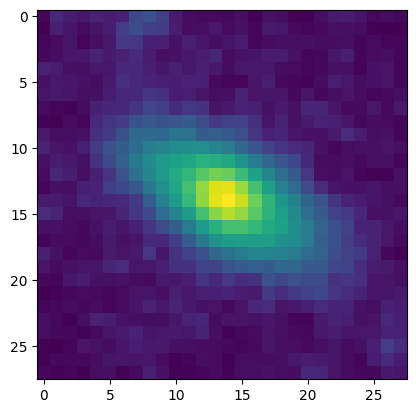

In [406]:
plt.imshow(data_gan[4])

In [313]:
# data_gan[0]

In [314]:
BUFFER_SIZE = 2203
BATCH_SIZE = 20

# train_dataset = tf.data.Dataset.from_tensor

In [317]:
def generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*64,input_shape=(200,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 64)))
    assert model.output_shape == (None, 7, 7, 64)  # Note: None is the batch size

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model

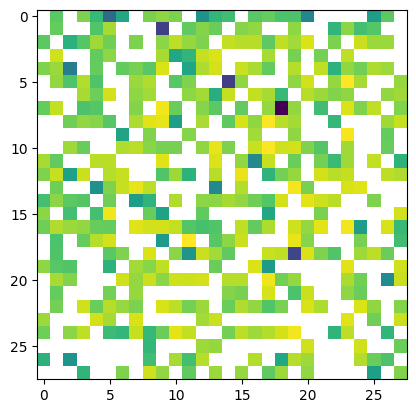

In [318]:
from matplotlib.colors import LogNorm
generator = generator_model()

noise = tf.random.normal([1, 200])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='viridis', norm=LogNorm())

In [319]:
generator.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 3136)           │       630,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 3136)           │        12,544 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_11 (LeakyReLU)      │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_3 (Reshape)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_9              │ (None, 7, 7, 128)      │       204,800 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_12 (LeakyReLU)      │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_10             │ (None, 14, 14, 64)     │       204,800 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_13 (LeakyReLU)      │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_11             │ (None, 28, 28, 1)      │         1,600 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,054,848 (4.02 MB)

 Trainable params: 1,048,192 (4.00 MB)

 Non-trainable params: 6,656 (26.00 KB)

In [320]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (4, 4), strides=(2, 2), padding='same',
                                     input_shape=(28, 28, 1)))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.2))

    model.add(layers.Conv2D(128, (4, 4), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.2))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

In [321]:
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print (decision)

tf.Tensor([[0.00468476]], shape=(1, 1), dtype=float32)


c:\Users\surya\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [322]:
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [323]:
def discriminator_loss(real_out, fake_out):
    real_loss = cross_entropy(tf.ones_like(real_out),real_out)
    fake_loss = cross_entropy(tf.zeros_like(fake_out),fake_out)
    return real_loss + fake_loss

def generator_loss(fake_out):
    return cross_entropy(tf.ones_like(fake_out),fake_out)

generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)



In [324]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [325]:
EPOCHS = 100
noise_dim = 200
num_examples_to_generate = 20

# You will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [326]:
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        gen_imgs = generator(noise, training=True)

        real_out = discriminator(images,training= True)
        fake_out = discriminator(gen_imgs, training=True)

        gen_loss = generator_loss(fake_out)
        disc_loss = discriminator_loss(real_out,fake_out)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [327]:
# from matplotlib.colors import LogNorm
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(8,8))

  for i in range(predictions.shape[0]):
      # plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 255, cmap='viridis',norm=LogNorm())
      plt.axis('off')

  plt.savefig('generated_images/image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

In [328]:
import time
def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
      train_step(image_batch)

    # Produce images for the GIF as you go
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                             epoch + 1,
                             seed)

    # Save the model every 15 epochs
    if (epoch + 1) % 15 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Generate after the final epoch
  display.clear_output(wait=True)
  generate_and_save_images(generator,
                           epochs,
                           seed)

In [329]:
# Batch and shuffle the data
data_gan = data_gan /255
train_dataset = tf.data.Dataset.from_tensor_slices(data_gan).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

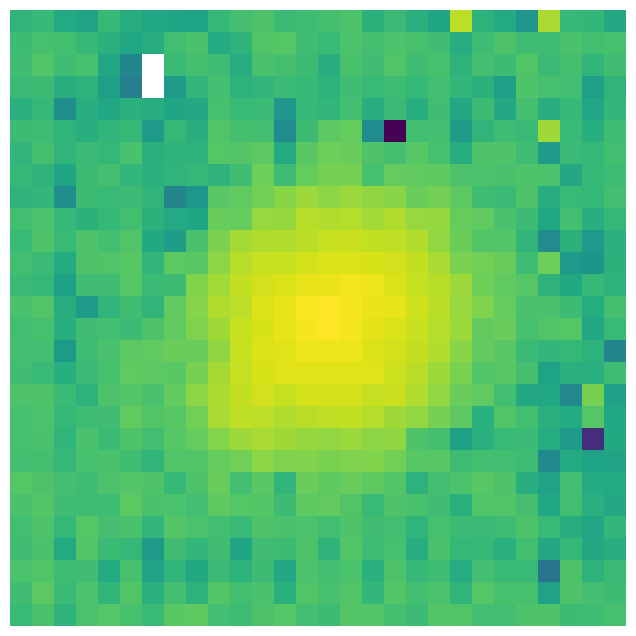

In [330]:
train(train_dataset, EPOCHS)

# Prediction on generated synthetic images

In [351]:
import os
import numpy as np

directory = 'generated_images'

images = [f for f in os.listdir(directory) if f.endswith('.png')]
# print(imgs[0])
imgs =[]

for file in images:
    file_path = os.path.join(directory, file)
    image = Image.open(file_path)
    # image = image.resize((28,28))
    imgs.append(image)





In [352]:
imgs = np.array(imgs)
imgs.shape

C:\Users\surya\AppData\Local\Temp\ipykernel_18708\3139486963.py:1: FutureWarning: The input object of type 'PngImageFile' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'PngImageFile', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  imgs = np.array(imgs)
C:\Users\surya\AppData\Local\Temp\ipykernel_18708\3139486963.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  imgs = np.array(imgs)


(100,)

In [353]:
for i in range(len(imgs)):
    imgs[i] = np.array(imgs[i])

In [354]:
imgs[0].shape

(800, 800, 4)

In [355]:
def rgba_to_grayscale(image_array):
    """
    Convert an RGB image to grayscale using the luminosity method.
    The weights are based on the human perception of colors.
    """
    r, g, b,a = image_array[:,:,0], image_array[:,:,1], image_array[:,:,2],image_array[:,:,3]
    grayscale_image = 0.2989 * r + 0.5870 * g + 0.1140 * b + 0.0* a
    return grayscale_image

for i in range(len(imgs)):
    imgs[i] = rgba_to_grayscale(imgs[i])

In [356]:
imgs[0].shape

(800, 800)

In [357]:
# for i in range(len(imgs)):
#     imgs[i]= np.mean(imgs[i],axis=2)

In [358]:
imgs[0].shape

(800, 800)

In [359]:
# gray_image=[]
for i in range(100):
    imgs[i].resize(28,28)

    # imgs[i] = imgs[i].reshape((28,28))
# imgs[0].shape

In [360]:
imgs = imgs/255

In [361]:
imgs[0]

array([[0.9999, 0.9999, 0.9999, 0.9999, 0.9999, 0.9999, 0.9999, 0.9999,
        0.9999, 0.9999, 0.9999, 0.9999, 0.9999, 0.9999, 0.9999, 0.9999,
        0.9999, 0.9999, 0.9999, 0.9999, 0.9999, 0.9999, 0.9999, 0.9999,
        0.9999, 0.9999, 0.9999, 0.9999],
       [0.9999, 0.9999, 0.9999, 0.9999, 0.9999, 0.9999, 0.9999, 0.9999,
        0.9999, 0.9999, 0.9999, 0.9999, 0.9999, 0.9999, 0.9999, 0.9999,
        0.9999, 0.9999, 0.9999, 0.9999, 0.9999, 0.9999, 0.9999, 0.9999,
        0.9999, 0.9999, 0.9999, 0.9999],
       [0.9999, 0.9999, 0.9999, 0.9999, 0.9999, 0.9999, 0.9999, 0.9999,
        0.9999, 0.9999, 0.9999, 0.9999, 0.9999, 0.9999, 0.9999, 0.9999,
        0.9999, 0.9999, 0.9999, 0.9999, 0.9999, 0.9999, 0.9999, 0.9999,
        0.9999, 0.9999, 0.9999, 0.9999],
       [0.9999, 0.9999, 0.9999, 0.9999, 0.9999, 0.9999, 0.9999, 0.9999,
        0.9999, 0.9999, 0.9999, 0.9999, 0.9999, 0.9999, 0.9999, 0.9999,
        0.9999, 0.9999, 0.9999, 0.9999, 0.9999, 0.9999, 0.9999, 0.9999,
        0.999

In [299]:
imgs[0] = np.squeeze(imgs[0])

In [342]:
imgs[0].shape

(28, 28)

In [362]:
imgs[0].shape

(28, 28)

In [348]:
# imgs[0] = np.expand_dims(imgs[0], axis=0)  # Add batch dimension
# imgs[0] = np.expand_dims(imgs[0], axis=-1)  # Add channel dimension
# cnn.predict(imgs[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


array([[1.0394137e-05, 9.9998963e-01, 2.3267482e-16]], dtype=float32)

In [349]:
# cnn.predict(imgs[0])

In [365]:
y_pred =[]
y_list=[]
gal=['Elliptical galaxy','Spiral galaxy', 'Barred-Spiral galaxy']
pred_gal=[]
for i in range(len(imgs)):
    inverted_image_array =imgs[i]
    inverted_image_array = np.expand_dims(inverted_image_array, axis=0)  # Add batch dimension
    inverted_image_array = np.expand_dims(inverted_image_array, axis=-1)  # Add channel dimension
    y_list.append(np.max(cnn.predict(inverted_image_array)))
    y_pred.append(np.argmax(cnn.predict(inverted_image_array)))
    pred_gal.append(gal[np.argmax(cnn.predict(inverted_image_array))])
y_pred[:5]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━

[1, 1, 1, 1, 1]

In [366]:
# pred_gal=='Spiral galaxy'
y_list

[0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9999896,
 0.9

In [368]:
pred_gal = np.array(pred_gal)
e_g = np.sum(pred_gal=='Elliptical galaxy')/100
s_g = np.sum(pred_gal=='Spiral galaxy')/100
sb_g = np.sum(pred_gal=='Barred-Spiral galaxy')/100

print(e_g,s_g,sb_g)

0.0 1.0 0.0


In [372]:
# imgs[0] = np.squeeze(imgs[0])

# plt.imshow(imgs[0],cmap='viridis',norm=LogNorm())

In [393]:
image1 = Image.open('generated_images/image_at_epoch_0100.png')

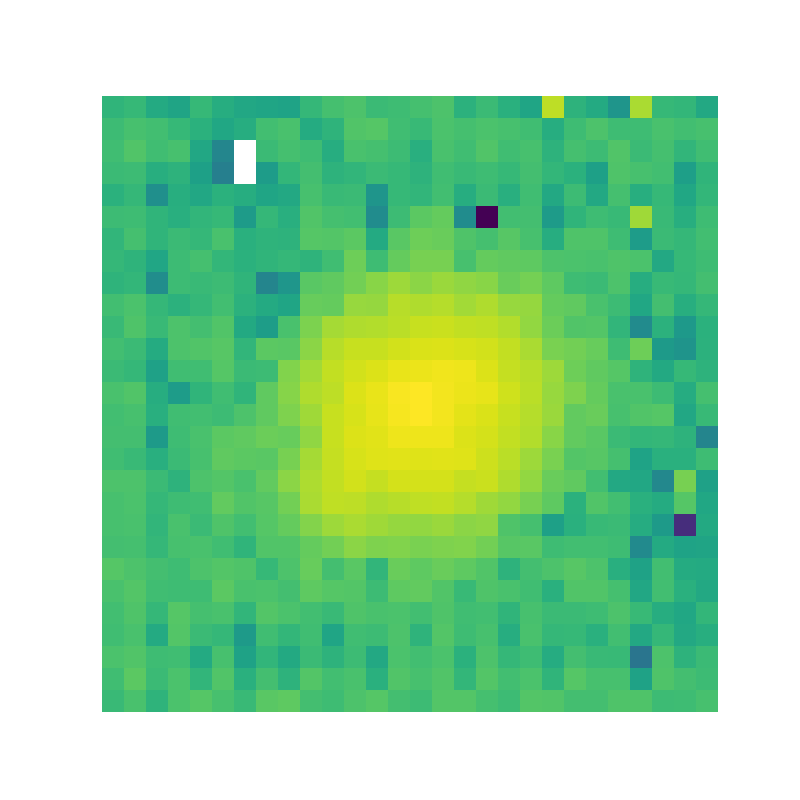

In [394]:
image1

In [395]:
image1 = np.array(image1)
image1.shape

(800, 800, 4)

In [396]:
image1 = rgba_to_grayscale(image1)


In [397]:
image1 = np.resize(image1,(28,28))
image1

array([[254.9745, 254.9745, 254.9745, 254.9745, 254.9745, 254.9745,
        254.9745, 254.9745, 254.9745, 254.9745, 254.9745, 254.9745,
        254.9745, 254.9745, 254.9745, 254.9745, 254.9745, 254.9745,
        254.9745, 254.9745, 254.9745, 254.9745, 254.9745, 254.9745,
        254.9745, 254.9745, 254.9745, 254.9745],
       [254.9745, 254.9745, 254.9745, 254.9745, 254.9745, 254.9745,
        254.9745, 254.9745, 254.9745, 254.9745, 254.9745, 254.9745,
        254.9745, 254.9745, 254.9745, 254.9745, 254.9745, 254.9745,
        254.9745, 254.9745, 254.9745, 254.9745, 254.9745, 254.9745,
        254.9745, 254.9745, 254.9745, 254.9745],
       [254.9745, 254.9745, 254.9745, 254.9745, 254.9745, 254.9745,
        254.9745, 254.9745, 254.9745, 254.9745, 254.9745, 254.9745,
        254.9745, 254.9745, 254.9745, 254.9745, 254.9745, 254.9745,
        254.9745, 254.9745, 254.9745, 254.9745, 254.9745, 254.9745,
        254.9745, 254.9745, 254.9745, 254.9745],
       [254.9745, 254.9745, 254.9745,

In [398]:
image1.shape

(28, 28)

In [399]:
image1 = image1/255

In [400]:
image1.shape

(28, 28)

In [401]:
image1 = np.expand_dims(image1, axis=0)  # Add batch dimension
image1 = np.expand_dims(image1, axis=-1)  # Add channel dimension
cnn.predict(image1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([[1.0394137e-05, 9.9998963e-01, 2.3267482e-16]], dtype=float32)